In [13]:
import cv2
import urllib.request
from matplotlib import pyplot as plt
from pylab import rcParams

def plt_image(image_url, size = (10,8)):

    # Downloads an image from a URL, and displays it in the notebook
    urllib.request.urlretrieve(image_url, "image.jpg") # downloads file as "image.jpg"
    image = cv2.imread("image.jpg")
    
    # If image is in color, then correct color coding from BGR to RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    rcParams['figure.figsize'] = size[0], size[1] #set image display size

    plt.axis("off")
    plt.imshow(image, cmap="Greys_r")
    plt.show()

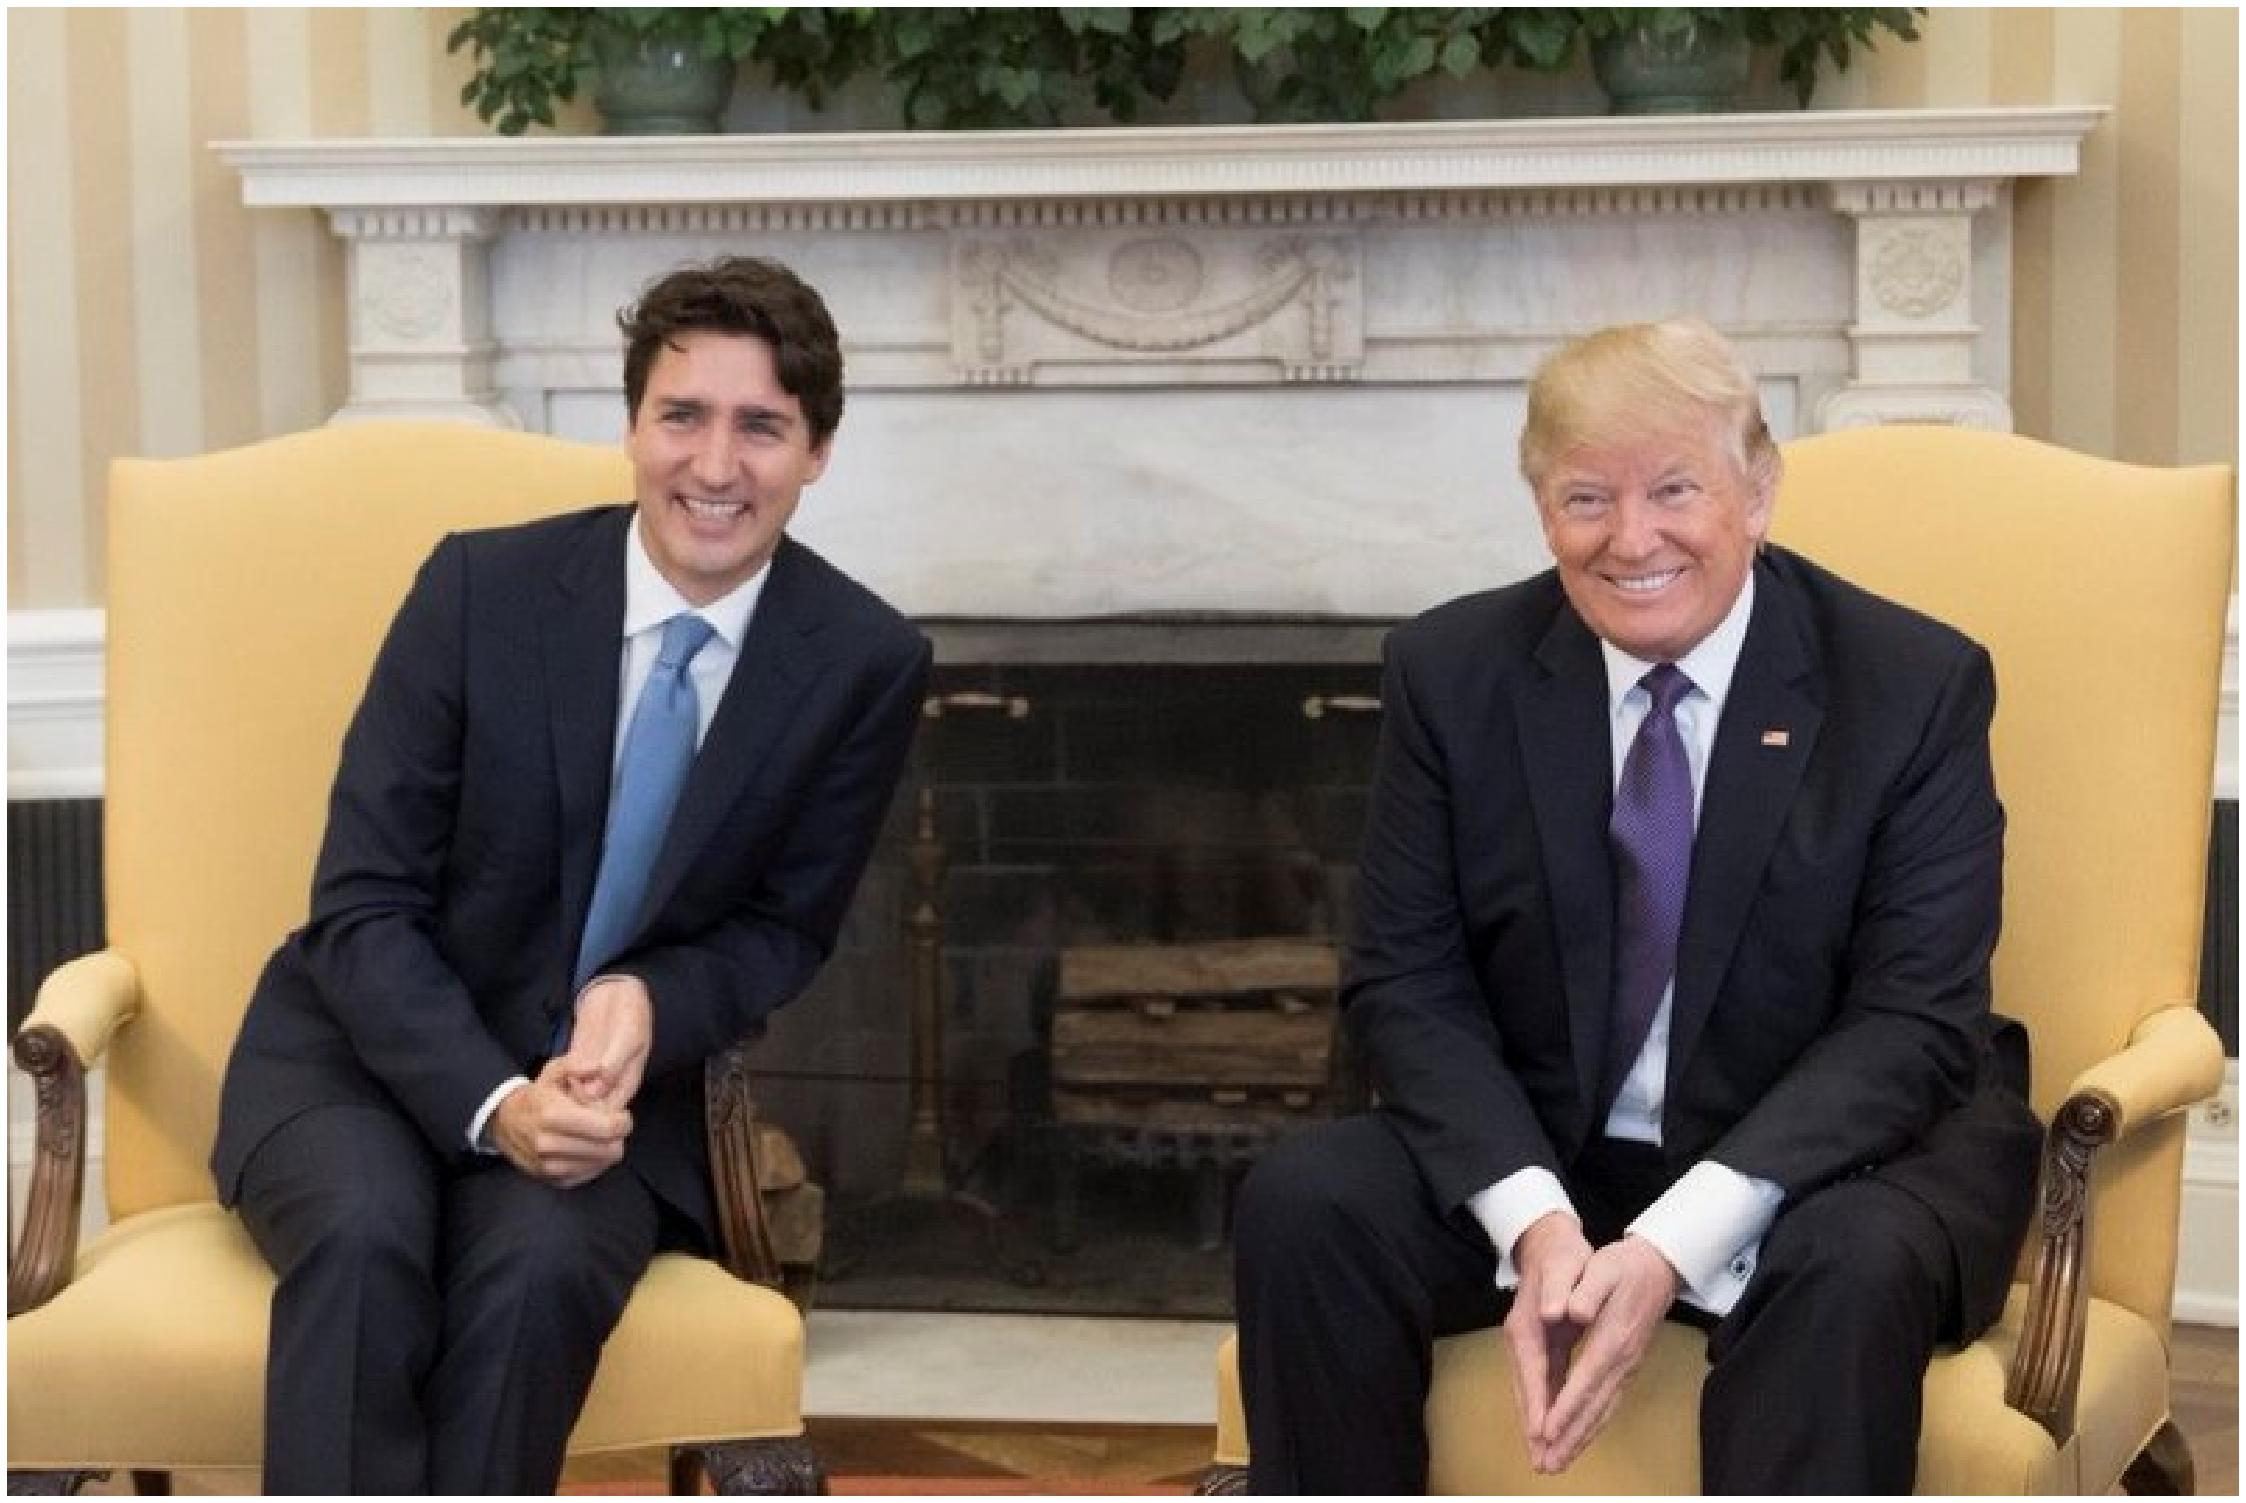

In [46]:
image_url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg'
plt_image(image_url,(40,40))

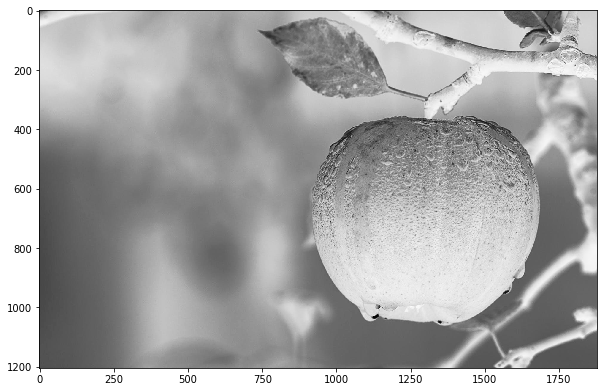

In [38]:
b = cv2.imread('2.jpg')
a = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
plt.imshow(a, cmap="Greys_r")
plt.show()

In [58]:
# Paste your API key for IBM Watson Visual Recognition below:
my_apikey = 'Y6ftVJqnQh3iOJslwZ9_gZCsOYT7rZq52bWZ_PLxWD-3'

In [63]:
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
authenticator = IAMAuthenticator(my_apikey)

visrec = VisualRecognitionV3('2020-04-05', 
                             authenticator=authenticator)

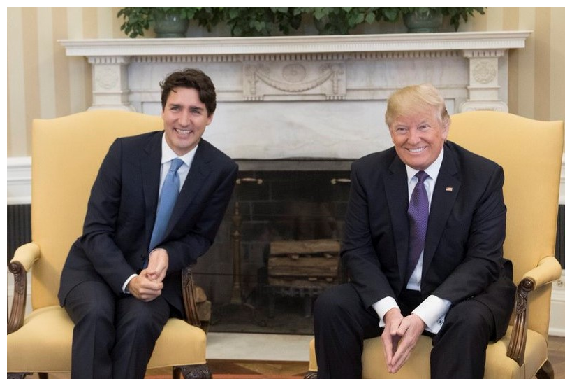

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "official",
              "score": 0.789,
              "type_hierarchy": "/person/official"
            },
            {
              "class": "person",
              "score": 0.82
            },
            {
              "class": "beige color",
              "score": 0.782
            }
          ]
        }
      ],
      "source_url": "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg",
      "resolved_url": "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 0
}


In [64]:
import json

image_url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg'


# threshold is set to 0.6, that means only classes that has a confidence score of 0.6 or greater will be shown
classes = visrec.classify(url=image_url,
                          threshold='0.6',
                          classifier_ids='default').get_result()

plt_image(image_url)
print(json.dumps(classes, indent=2))

In [65]:

from pandas.io.json import json_normalize

def getdf_visrec(url, apikey = my_apikey):
    
    json_result = visrec.classify(url=url,
                              threshold='0.6',
                              classifier_ids='default').get_result()
    
    json_classes = json_result['images'][0]['classifiers'][0]['classes']
    
    df = json_normalize(json_classes).sort_values('score', ascending=False).reset_index(drop=True)
    
    return df

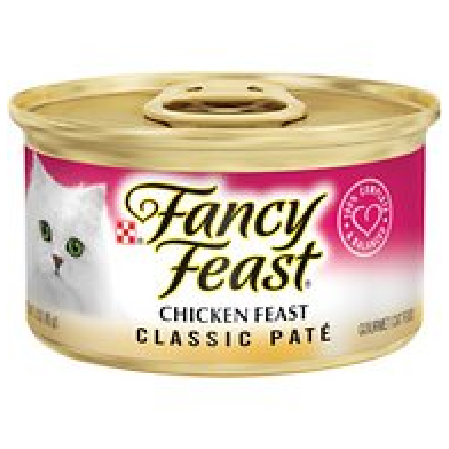

,class,score,type_hierarchy
0,food,0.877,NaN
1,cat food,0.779,/food/feed/cat food
2,feed,0.779,NaN
3,toiletry,0.772,NaN
4,pale yellow color,0.697,NaN
5,CD-R,0.681,/memory device/CD-R
6,memory device,0.681,NaN
7,beige color,0.679,NaN
8,canned food,0.627,/food/food product/canned food
9,food product,0.627,NaN


In [66]:
url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Images/76011_MAIN._AC_SS190_V1446845310_.jpg'
plt_image(url)
getdf_visrec(url)

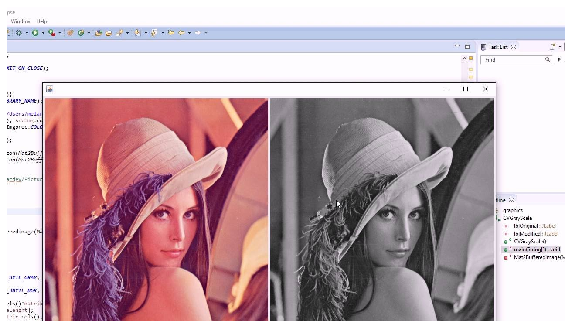

,class,score,type_hierarchy
0,alizarine red color,0.906,NaN
1,web site,0.705,/machine/computer/web site
2,computer,0.705,NaN
3,machine,0.705,NaN
4,reddish orange color,0.629,NaN
5,print media,0.600,NaN


In [69]:
url = 'https://i.ytimg.com/vi/YG3A2LjL_0c/maxresdefault.jpg'
plt_image(url)
getdf_visrec(url)